# State Action Notebook - Web

In this notebook we are going to look at the state / action JSON that we get from Web-Client. 

In [1]:
import json # JSON handling
import numpy as np # linear algebra
import matplotlib.pyplot as plt # visualisation
%matplotlib inline

## State

In [2]:
state = open('./example_observation_state.json').read()
state = json.loads(state)

Following are the elements in state:
```python
>>> state.keys()
>>> ['city', 'client', 'dipl', 'game', 'gov', 'map', 'options', 'player', 'rules', 'tech', 'unit']
```

In [3]:
STATE_INFORMATION_KEYS = ['city', 'client', 'dipl', 'game', 'gov', 'map', 'options', 'player', 'rules', 'tech', 'unit']

ACTION_INFO = ['city', 'dipl', 'gov', 'map', 'tech', 'unit']

In [49]:
state['unit'].keys()

dict_keys(['110', '111', '112', '150', '157', '159', '160', '161', '162', '163', '168', '169', '171'])

In [30]:
class RulesEngine():
    def __init__(self, state):
        self.num_attr = 0
        self.attr = []
        for key in state:
            setattr(self, key, state[key])
            self.num_attr += 1
            self.attr.append(key)

In [57]:
re = RulesEngine(state['unit']['111'])
for a in re.attr:
    print(a)

print('[*]',re.type_rule_name)

can_transport
health
home_city
moves_left
type_attack_strength
type_build_cost
type_convert_time
type_converted_to
type_defense_strength
type_firepower
type_hp
type_move_rate
type_rule_name
type_vision_radius_sq
type_worker
upkeep_food
upkeep_gold
upkeep_shield
veteran
[*] Workers


In [54]:
print(state['unit']['110'])

{'can_transport': False, 'health': 10, 'home_city': -1, 'moves_left': 0, 'type_attack_strength': 0, 'type_build_cost': 30, 'type_convert_time': 1, 'type_converted_to': 52, 'type_defense_strength': 1, 'type_firepower': 1, 'type_hp': 10, 'type_move_rate': 3, 'type_rule_name': 'Workers', 'type_vision_radius_sq': 2, 'type_worker': True, 'upkeep_food': 0, 'upkeep_gold': 0, 'upkeep_shield': 0, 'veteran': 0}


In [49]:
city_141 = list(state['city']['141'].keys())

In [50]:
city_158 = list(state['city']['158'].keys())

In [53]:
city_141 == city_158

True

In [76]:
class CityInference():
    def __init__(self, entries):
        # entries is a dictionary
        for k, v in entries.items():
            setattr(self, k, v)

In [77]:
ci_158 = CityInference(state['city'])

In [80]:
ci_158.bulbs

AttributeError: 'CityInference' object has no attribute 'bulbs'

In [111]:
# get the improvement dictionary
impr2num = {}
num2impr = {}

for k in state['city']['158']:
    if 'impr_int' in k:
        # perform replacements
        k_ = k.replace('.', '_')
        k_ = k_.replace(' ', '_')
        k_ = k_.replace("'", '_')
        k_ = k_.repace('int_', '_').lower()
        
        # get improvement numbers
        num = int(k.split('_')[-1])
        
        # drop the numbers
        if num > 9: k = k[:-3]
        else: k = k[:-2]
        
        # add to dicts
        impr2num.update({k: num})
        num2impr.update({num: k})
        
    else:
        not_imprs.append(k)
        
# establish the improvement array
impr_array = [False for _ in range(len(impr2num))]

In [105]:
impr2num = {}
num2impr = {}
for i in range(len(imprs)):
    # format string
    k = imprs[i].replace('.', '_')
    k = k.replace(' ', '_')
    k = k.replace("'", '_')
    k = k.replace('int_', '').lower()
    
    # get number of improvement
    num = int(k.split('_')[-1])
    
    # drop last numbers
    if num > 9: k = k[:-3]
    else: k = k[:-2]
        
    # add to dicts
    impr2num.update({k: num})
    num2impr.update({num: k})
    

In [114]:
imprs

["impr_int_A.Smith's Trading Co._40",
 'impr_int_Airport_0',
 'impr_int_Apollo Program_39',
 'impr_int_Aqueduct_1',
 'impr_int_Bank_2',
 'impr_int_Barracks III_5',
 'impr_int_Barracks II_4',
 'impr_int_Barracks_3',
 'impr_int_Cathedral_6',
 'impr_int_City Walls_7',
 'impr_int_Coastal Defense_8',
 'impr_int_Coinage_67',
 'impr_int_Colosseum_9',
 'impr_int_Colossus_41',
 "impr_int_Copernicus' Observatory_42",
 'impr_int_Courthouse_10',
 'impr_int_Cure For Cancer_43',
 "impr_int_Darwin's Voyage_44",
 'impr_int_Eiffel Tower_45',
 'impr_int_Factory_11',
 'impr_int_Granary_12',
 'impr_int_Great Library_46',
 'impr_int_Great Wall_47',
 'impr_int_Hanging Gardens_48',
 'impr_int_Harbor_13',
 'impr_int_Hoover Dam_49',
 'impr_int_Hydro Plant_14',
 "impr_int_Isaac Newton's College_50",
 "impr_int_J.S. Bach's Cathedral_51",
 "impr_int_King Richard's Crusade_52",
 "impr_int_Leonardo's Workshop_53",
 'impr_int_Library_15',
 'impr_int_Lighthouse_54',
 "impr_int_Magellan's Expedition_55",
 'impr_int_Ma

In [107]:
impr2num

{'impr_a_smith_s_trading_co_': 40,
 'impr_airport': 0,
 'impr_apollo_program': 39,
 'impr_aqueduct': 1,
 'impr_bank': 2,
 'impr_barracks_iii': 5,
 'impr_barracks_ii': 4,
 'impr_barracks': 3,
 'impr_cathedral': 6,
 'impr_city_walls': 7,
 'impr_coastal_defense': 8,
 'impr_coinage': 67,
 'impr_colosseum': 9,
 'impr_colossus': 41,
 'impr_copernicus__observatory': 42,
 'impr_courthouse': 10,
 'impr_cure_for_cancer': 43,
 'impr_darwin_s_voyage': 44,
 'impr_eiffel_tower': 45,
 'impr_factory': 11,
 'impr_granary': 12,
 'impr_great_library': 46,
 'impr_great_wall': 47,
 'impr_hanging_gardens': 48,
 'impr_harbor': 13,
 'impr_hoover_dam': 49,
 'impr_hydro_plant': 14,
 'impr_isaac_newton_s_college': 50,
 'impr_j_s__bach_s_cathedral': 51,
 'impr_king_richard_s_crusade': 52,
 'impr_leonardo_s_workshop': 53,
 'impr_library': 15,
 'impr_lighthouse': 54,
 'impr_magellan_s_expedition': 55,
 'impr_manhattan_project': 56,
 'impr_marco_polo_s_embassy': 57,
 'impr_marketplace': 16,
 'impr_mass_transit': 17,

## Maps Maps Maps

(84, 56)


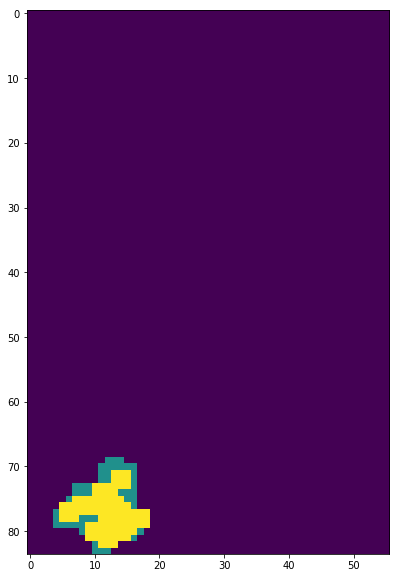

In [58]:
map_status = state['map']['status']
map_status = np.array(map_status)
print(map_status.shape)
# vis
plt.figure(figsize = (10, 10))
plt.imshow(map_status)

(84, 56)


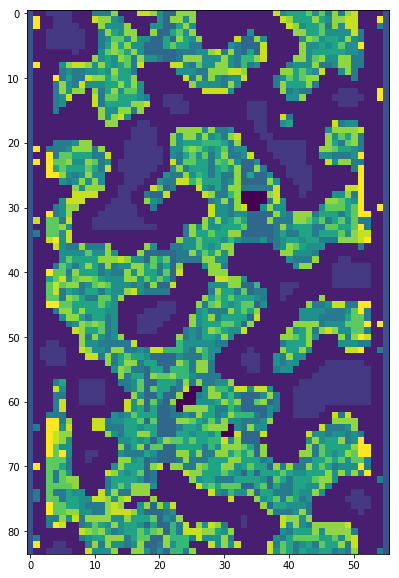

In [84]:
map_terrain = state['map']['terrain']
map_terrain = np.array(map_terrain)
print(map_terrain.shape)
# vis
plt.figure(figsize = (10, 10))
plt.imshow(map_terrain)

(84, 56)


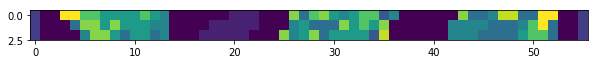

In [86]:
# vis
print(map_terrain.shape)
plt.figure(figsize = (10, 10))
plt.imshow(map_terrain[45:48])

In [74]:
map_status[82]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 2., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

(84, 56, 128)


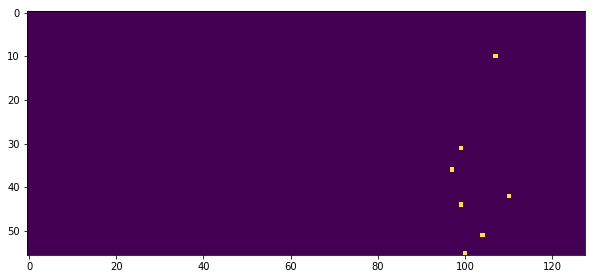

In [36]:
map_extras = state['map']['extras']
map_extras = np.array(map_extras)
print(map_extras.shape)
# vis
plt.figure(figsize = (10, 10))
plt.imshow(map_extras[5])

I still have a bot of confusion when it comes to using the maps, in particular `status` maps. `status` is equivalent of `holding` that I had. Will go over the various timesteps from the 18 turn game and see how it changes and the gradual development. This is giving me ideas for having a `make_map_gif()` function to make the map growth into a video or GIF.

In [87]:
from glob import glob

In [119]:
# import all the files
sa_files_all = glob('./examples/*.json')

# clustering the files based on turns
turn_clus_files = [[] for _ in range(18)]
for f in sa_files_all:
    turn_num = int(f.split('_')[1][-2:])
    turn_clus_files[turn_num].append(f)
    
for f in turn_clus_files[0]:
    print(f)

./examples/observation_turn00_agentAct0007_actions.json
./examples/observation_turn00_agentAct0005_nextAction.json
./examples/observation_turn00_agentAct0002_nextAction.json
./examples/observation_turn00_agentAct0006_actions.json
./examples/observation_turn00_agentAct0001_actions.json
./examples/observation_turn00_agentAct0005_state.json
./examples/observation_turn00_agentAct0008_state.json
./examples/observation_turn00_agentAct0003_nextAction.json
./examples/observation_turn00_agentAct0002_state.json
./examples/observation_turn00_agentAct0007_state.json
./examples/observation_turn00_agentAct0004_nextAction.json
./examples/observation_turn00_agentAct0004_state.json
./examples/observation_turn00_agentAct0001_nextAction.json
./examples/observation_turn00_agentAct0008_actions.json
./examples/observation_turn00_agentAct0006_nextAction.json
./examples/observation_turn00_agentAct0001_state.json
./examples/observation_turn00_agentAct0003_actions.json
./examples/observation_turn00_agentAct0006

In [118]:
# going over turn 7 and seeing the growth of status map over time
map_status = []
for f in turn_clus_files[0]:
    if f.split('_')[-1] == 'state.json':
        read_ = open(f).read()
        state = json.loads(read_)
        print(state['map'])
        mp_ = np.array(state['map']['status'])

{'extras': 'not serializable', 'status': 'not serializable', 'terrain': 'not serializable'}
{'extras': 'not serializable', 'status': 'not serializable', 'terrain': 'not serializable'}
{'extras': 'not serializable', 'status': 'not serializable', 'terrain': 'not serializable'}
{'extras': 'not serializable', 'status': 'not serializable', 'terrain': 'not serializable'}
{'extras': 'not serializable', 'status': 'not serializable', 'terrain': 'not serializable'}
{'extras': 'not serializable', 'status': 'not serializable', 'terrain': 'not serializable'}
{'extras': 'not serializable', 'status': 'not serializable', 'terrain': 'not serializable'}
{'extras': 'not serializable', 'status': 'not serializable', 'terrain': 'not serializable'}
{'extras': 'not serializable', 'status': 'not serializable', 'terrain': 'not serializable'}
{'extras': 'not serializable', 'status': 'not serializable', 'terrain': 'not serializable'}


In [112]:
mp_

array('not serializable', dtype='<U16')

## Action

In [43]:
action = open('./example_observations_actions.json').read()
action = json.loads(action)

In [44]:
action.keys()

dict_keys(['city', 'client', 'dipl', 'game', 'gov', 'map', 'options', 'player', 'rules', 'tech', 'unit'])

In [46]:
action['unit'].keys()

dict_keys(['110', '111', '112', '150', '157', '159', '160', '161', '162', '163', '168', '169', '171'])

In [48]:
action['unit']['111']

{'airbase': False,
 'airlift': False,
 'autosettlers': True,
 'build': False,
 'disband': True,
 'explore': False,
 'fallout': False,
 'forest': False,
 'fortify': False,
 'fortress': False,
 'goto_0': True,
 'goto_1': True,
 'goto_2': True,
 'goto_3': True,
 'goto_4': True,
 'goto_5': True,
 'goto_6': True,
 'goto_7': True,
 'homecity': False,
 'irrigation': False,
 'mine': False,
 'noorders': False,
 'paradrop': False,
 'pillage': False,
 'pollution': False,
 'railroad': False,
 'road': False,
 'transform': False,
 'unit_load': False,
 'unit_unload': False,
 'upgrade': False}

In [22]:
action['game']

{}